In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-ads-revenue/youtube ads.csv


## Importing Required Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset

In [4]:
df = pd.read_csv('/kaggle/input/youtube-ads-revenue/youtube ads.csv')

In [5]:
df

,Date,Ads Revenue (Mn)
0,31-03-2019,3025000000
1,30-06-2019,3603000000
2,30-09-2019,3804000000
3,31-12-2019,4717000000
4,31-03-2020,4038000000
5,30-06-2020,3812000000
6,30-09-2020,5037000000
7,31-12-2020,6885000000
8,31-03-2021,6005000000
9,30-06-2021,7002000000


## Data Formatting : Checking Data Types

In [6]:
#Checking Datatype
df.dtypes

Date                object
Ads Revenue (Mn)     int64
dtype: object

In [7]:
#Converting 'Date' column from object to datetime type
df['Date'] = df['Date'].astype('datetime64')

/tmp/ipykernel_32/699825883.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = df['Date'].astype('datetime64')


## Exploring data

In [9]:
#adding year column
df['year'] = df['Date'].dt.year

In [10]:
#Grouping data by year
df_year = df.groupby('year')

In [13]:
#Calculating Mean revenue, total revenue each year
df_mean_revenue = df_year.mean()
print(df_mean_revenue)

      Ads Revenue (Mn)
year                  
2019      3.787250e+09
2020      4.943000e+09
2021      7.211250e+09
2022      7.310750e+09
2023      6.693000e+09


/tmp/ipykernel_32/164172186.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_revenue = df_year.mean()


In [14]:
df_total_revenue = df_year.sum()
df_total_revenue

/tmp/ipykernel_32/791882422.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_total_revenue = df_year.sum()


,Ads Revenue (Mn)
year,
2019,15149000000
2020,19772000000
2021,28845000000
2022,29243000000
2023,6693000000


## Plotting Ads Revenue

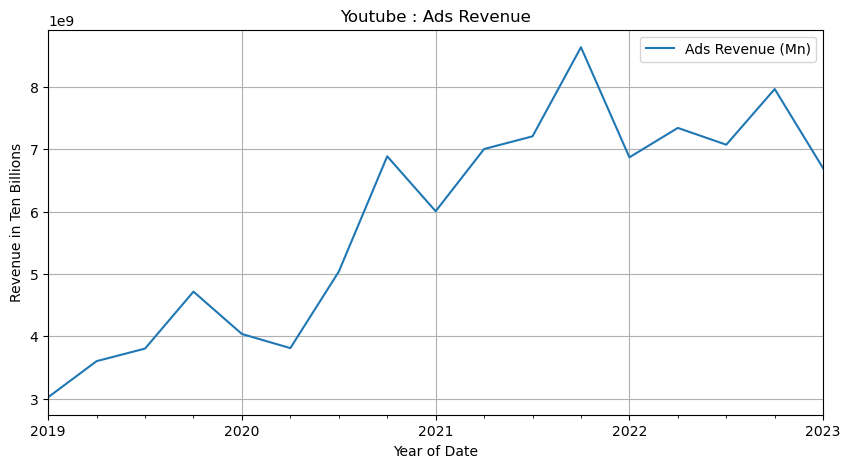

In [41]:
df.plot(x='Date',y ='Ads Revenue (Mn)',kind='line',title='Youtube : Ads Revenue',figsize = (10,5))
plt.xlabel('Year of Date')
plt.ylabel('Revenue in Ten Billions')
plt.grid(True)
plt.show()

## Plotting Change in Revenue

In [43]:
change_revenue_percent = list()
row_index = 0
for i in df['Ads Revenue (Mn)']:
    if row_index == 0:
        previous_revenue = i
        row_index = row_index +1
    else:
        change_revenue_percent.append(((i - previous_revenue)*100)/previous_revenue)
        row_index = row_index +1
    previous_revenue = i
    
change_revenue_percent

[19.107438016528924,
 5.578684429641965,
 24.00105152471083,
 -14.394742421030315,
 -5.596830113917781,
 32.13536201469045,
 36.688505062537224,
 -12.781408859840232,
 16.602830974188176,
 2.8991716652385033,
 19.819569743233867,
 -20.433221359898067,
 6.85689328868831,
 -3.664850136239782,
 12.614905953896196,
 -15.948763029009168]

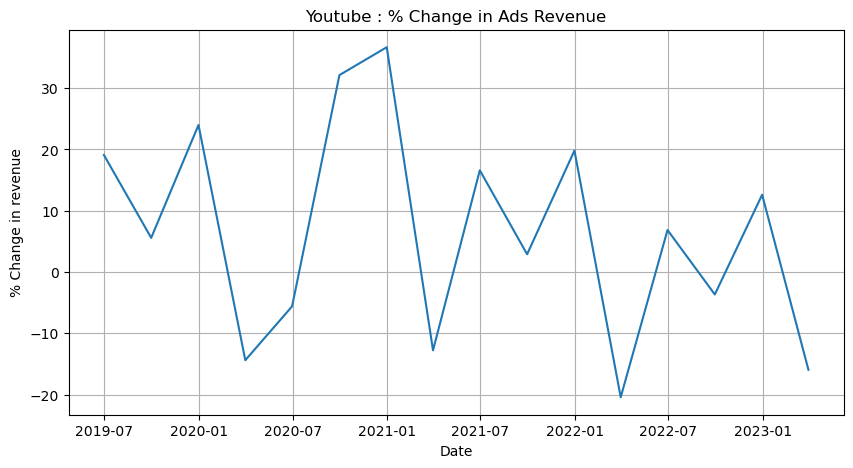

In [44]:
plt.figure(figsize=(10,5))
plt.plot(df.iloc[:,0][1:],change_revenue_percent)
plt.xlabel('Date')
plt.ylabel('% Change in revenue')
plt.title('Youtube : % Change in Ads Revenue')
plt.grid(True)
plt.show()